In [1]:
using Polynomials
using SpecialPolynomials
using Plots
using LinearAlgebra
using CSV
using DataFrames
using Statistics

# Laboratorium 10
## Zadanie 1 (1 pkt)
Narysować 6 pierwszych wielomianów Hermita (na jednym wykresie albo siatce 2x3 lub 3x2)

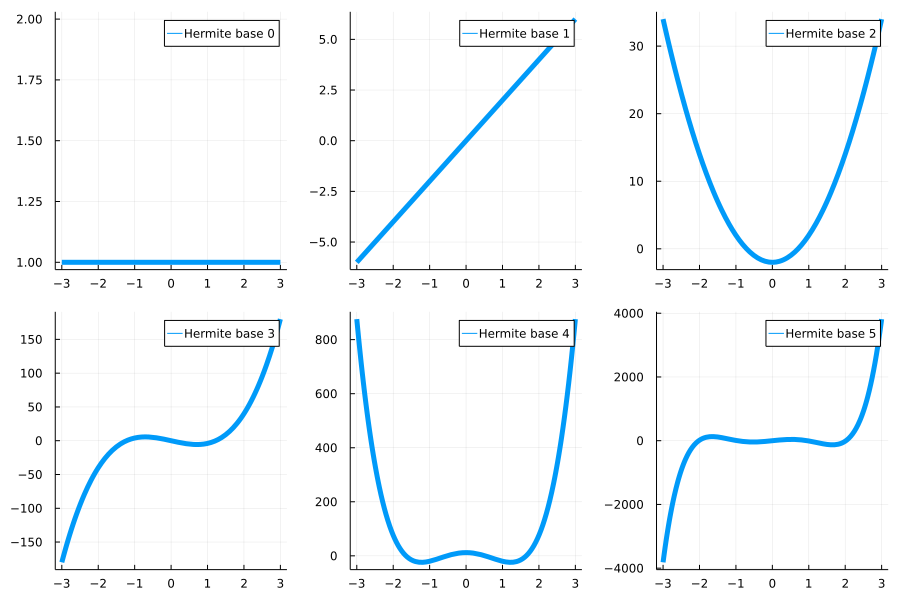

In [2]:
hermite = [basis(Hermite, i) for i in 0:1:5]

plot([x -> hermite[i](x) for i in 1:1:6], -3, 3, 
    labels = ["Hermite base 0" "Hermite base 1" "Hermite base 2" "Hermite base 3"  "Hermite base 4"  "Hermite base 5"], 
    layout = 6, size = (900, 600), width = 5)

## Zadanie 2  (1 pkt)
Narysować 6 pierwszych funkcji aproksymujących

In [3]:
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    # normalize to have norm 1
    if norm
        return normalize(app)
    end
    return app
end

base_fun (generic function with 2 methods)

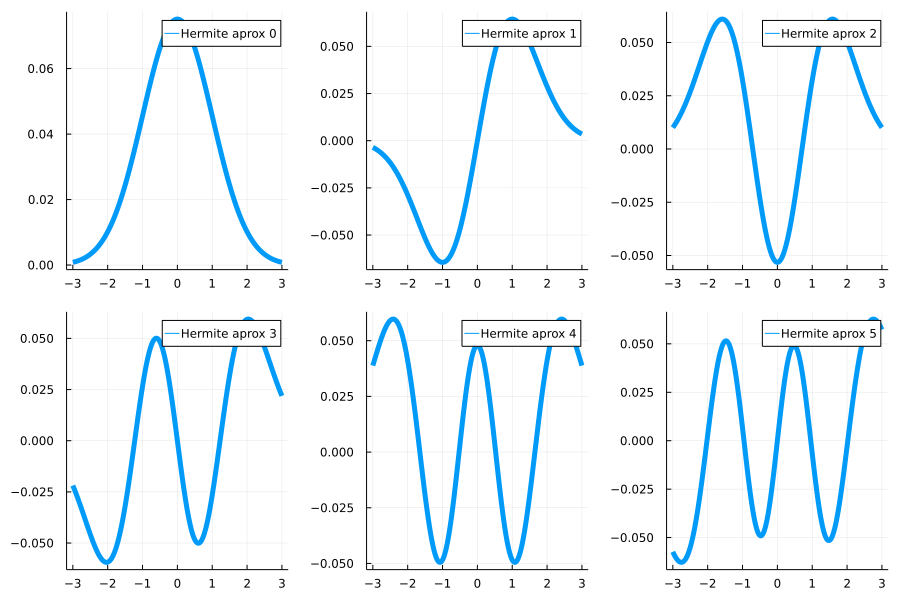

In [4]:
functions = [base_fun(i, -3:0.01:3) for i in 0:1:5]

plot(-3:0.01:3, functions, 
    labels = ["Hermite aprox 0" "Hermite aprox 1" "Hermite aprox 2" "Hermite aprox 3" "Hermite aprox 4"  "Hermite aprox 5"], 
    layout = 6, size = (900, 600), width = 5)

## Zadanie 3  (1 pkt)
Pokazać, że same wielomiany nie są ortogonane, ale już z funkcją wagową $exp(-x^2)$ są. Uzyć metody z wektorami wartości, założyć pewien przedział.

In [5]:
hermite_values = [normalize([hermite[i](x) for x in -3:0.1:3]) for i in 1:1:6]
dot_test = Array{Float64, 2}(undef, 6, 6); 

for (i, f_i) in enumerate(hermite_values) 
    for (j, f_j) in enumerate(hermite_values)
        dot_test[i,j] = dot(f_i, f_j)
    end
end

display(dot_test)

6×6 Matrix{Float64}:
  1.0          -3.46945e-18   0.684168     …   0.497423     2.60209e-18
 -3.46945e-18   1.0           3.1225e-17      -1.38778e-17  0.673917
  0.684168      3.1225e-17    1.0              0.911318     6.245e-17
  6.93889e-18   0.858892     -3.46945e-17      1.38778e-17  0.925079
  0.497423     -1.38778e-17   0.911318         1.0          1.38778e-17
  2.60209e-18   0.673917      6.245e-17    …   1.38778e-17  1.0

Jak widać, wartość np pod indeksem (1, 2) lub (1, 5) są znacząco różne od zera, zatem wielomiany nie są ortogonalne.

In [6]:
function_values = [base_fun(i, -3:0.1:3) for i in 0:1:5]


for (i, f_i) in enumerate(function_values) 
    for (j, f_j) in enumerate(function_values)
        dot_test[i,j] = dot(f_i, f_j)
    end
end

display(dot_test)

6×6 Matrix{Float64}:
  1.0          -6.87791e-19  -0.0002194    …  -0.00102464   -2.60209e-18
 -6.87791e-19   1.0          -1.24683e-18      4.11997e-18  -0.00793284
 -0.0002194    -1.24683e-18   1.0             -0.0145396    -1.73472e-18
 -1.16552e-18  -0.0023814    -7.80626e-18     -6.93889e-18  -0.0600334
 -0.00102464    4.11997e-18  -0.0145396        1.0           1.73472e-17
 -2.60209e-18  -0.00793284   -1.73472e-18  …   1.73472e-17   1.0

Jak widać, tutaj wszystkie wartości niebędące na przekątnej są bliskie zeru, zatem możemy je uznac za ortogonalne.

## Zadanie 4  (1 pkt)
Dokonać aproksymacji zespołu QRS typu N oraz V za pomocą kilku kolejnych stopni. Przedstawić osobno wykresy dla N i V.

In [7]:
ekg_data = CSV.read("ecg_data.csv", DataFrame)

x_ekg = ekg_data.time*40
y_ekgV = ekg_data.signalV
y_ekgN = ekg_data.signalN

first(ekg_data, 5)

,time,signalN,signalV
,Float64,Float64,Float64
1,-0.1,0.0183886,-0.0990972
2,-0.0972222,0.0145191,-0.0920442
3,-0.0944444,0.012849,-0.0831644
4,-0.0916667,0.0124946,-0.0722728
5,-0.0888889,0.0124117,-0.0593656


In [8]:
function approx(x, y, max_degree)
    result = Array{Float64, 1}(undef, length(x))
    for i in 0:1:max_degree
        poly_approx = base_fun(i, x)
        coefficient = dot(y, poly_approx)
        aprox = coefficient * poly_approx
        result .+= aprox
    end
    return result
end

approx (generic function with 1 method)

#### Aproksymacja N

In [9]:
max_deg = 11
Nresults = Array{Float64, 2}(undef, max_deg, length(x_ekg));

for i in 0:1:(max_deg - 1)
    Nresults[i + 1,:] = approx(x_ekg, y_ekgN, i)
end

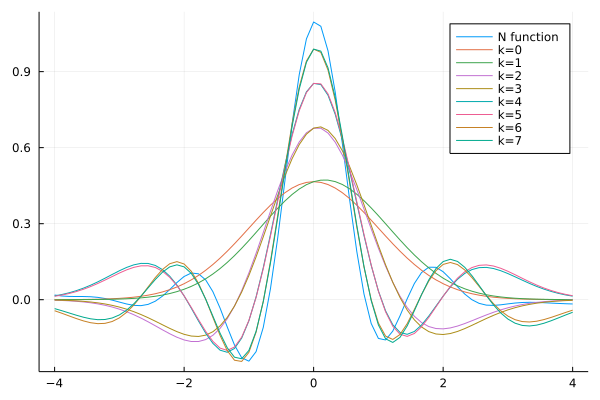

In [10]:
plot(x_ekg, y_ekgN, label="N function")

labels = ["k=0", "k=1", "k=2", "k=3", "k=4", "k=5", "k=6", "k=7"]
for i in 1:1:8
    plot!(x_ekg, Nresults[i,:], label=labels[i])
end

plot!()

#### Aproksymacja V

In [25]:
max_deg = 11
Vresults = Array{Float64, 2}(undef, max_deg, length(x_ekg));

for i in 0:1:(max_deg - 1)
    Vresults[i + 1,:] = approx(x_ekg, y_ekgV, i)
end

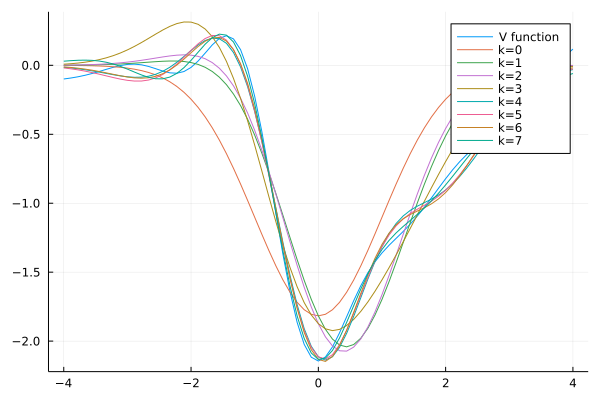

In [26]:
plot(x_ekg, y_ekgV, label="V function")

labels = ["k=0", "k=1", "k=2", "k=3", "k=4", "k=5", "k=6", "k=7"]
for i in 1:1:8
    plot!(x_ekg, Vresults[i,:], label=labels[i])
end

plot!()

## Zadanie 5  (1 pkt)
Przedstawić wykres błędu aproksymacji w zależności od stopnia wielomianu dla stopni od 0 do 10. Jakiego stopnia należy użyć gdybyśmy mieli robić coś dalej z rezultatem aproksymacji?

In [27]:
function mse(y1, y2)
    return mean((y1-y2).^2)
end

mse (generic function with 1 method)

Dla N:

In [28]:
Nerror = Array{Float64, 2}(undef, 10, 2)

for i in 0:1:9
    Nerror[i + 1, 1] = i
    Nerror[i + 1, 2] = mse(Nresults[i + 1,:], y_ekgN)
end

Dla V:

In [29]:
Verror = Array{Float64, 2}(undef, 10, 2)

for i in 0:1:9
    Verror[i + 1, 1] = i
    Verror[i + 1, 2] = mse(Vresults[i + 1,:], y_ekgV)
end

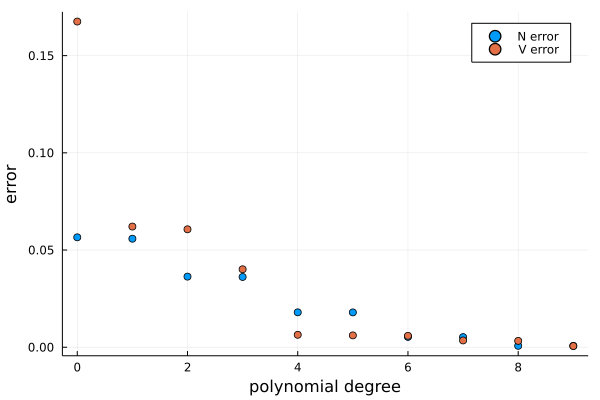

In [30]:
scatter(Nerror[:,1], Nerror[:,2], label="N error",
    xlabel = "polynomial degree", ylabel = "error")

scatter!(Verror[:,1], Verror[:,2], label="V error")